In [195]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
import csv
import random
from geopandas.tools import sjoin


Defining input random coordinates

Sample Data Points =1000,can be increased by changing the Global Variable

In [196]:
lat = []
lon = []
data_points = 1000
for i in range(data_points):
    x = random.uniform(-90,90)
    lat.append(x)
    
    
for i in range(data_points):
    x = random.uniform(-180,180)
    lon.append(x)

df_cord = pd.DataFrame(lon , columns = ['Lon'])
df_cord['Lat'] = lat
geometry = [Point(xy) for xy in zip(df_cord.Lon, df_cord.Lat)]
df_cord = df_cord.drop(['Lon' , 'Lat' ], axis=1)
crs = {'init': 'epsg:4326'}
gdf = geopandas.GeoDataFrame(df_cord, crs=crs, geometry=geometry)


Visualizing the input coordinates on World Map

      pop_est continent         name iso_a3  gdp_md_est  \
0  28400000.0      Asia  Afghanistan    AFG     22270.0   
1  12799293.0    Africa       Angola    AGO    110300.0   
2   3639453.0    Europe      Albania    ALB     21810.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  


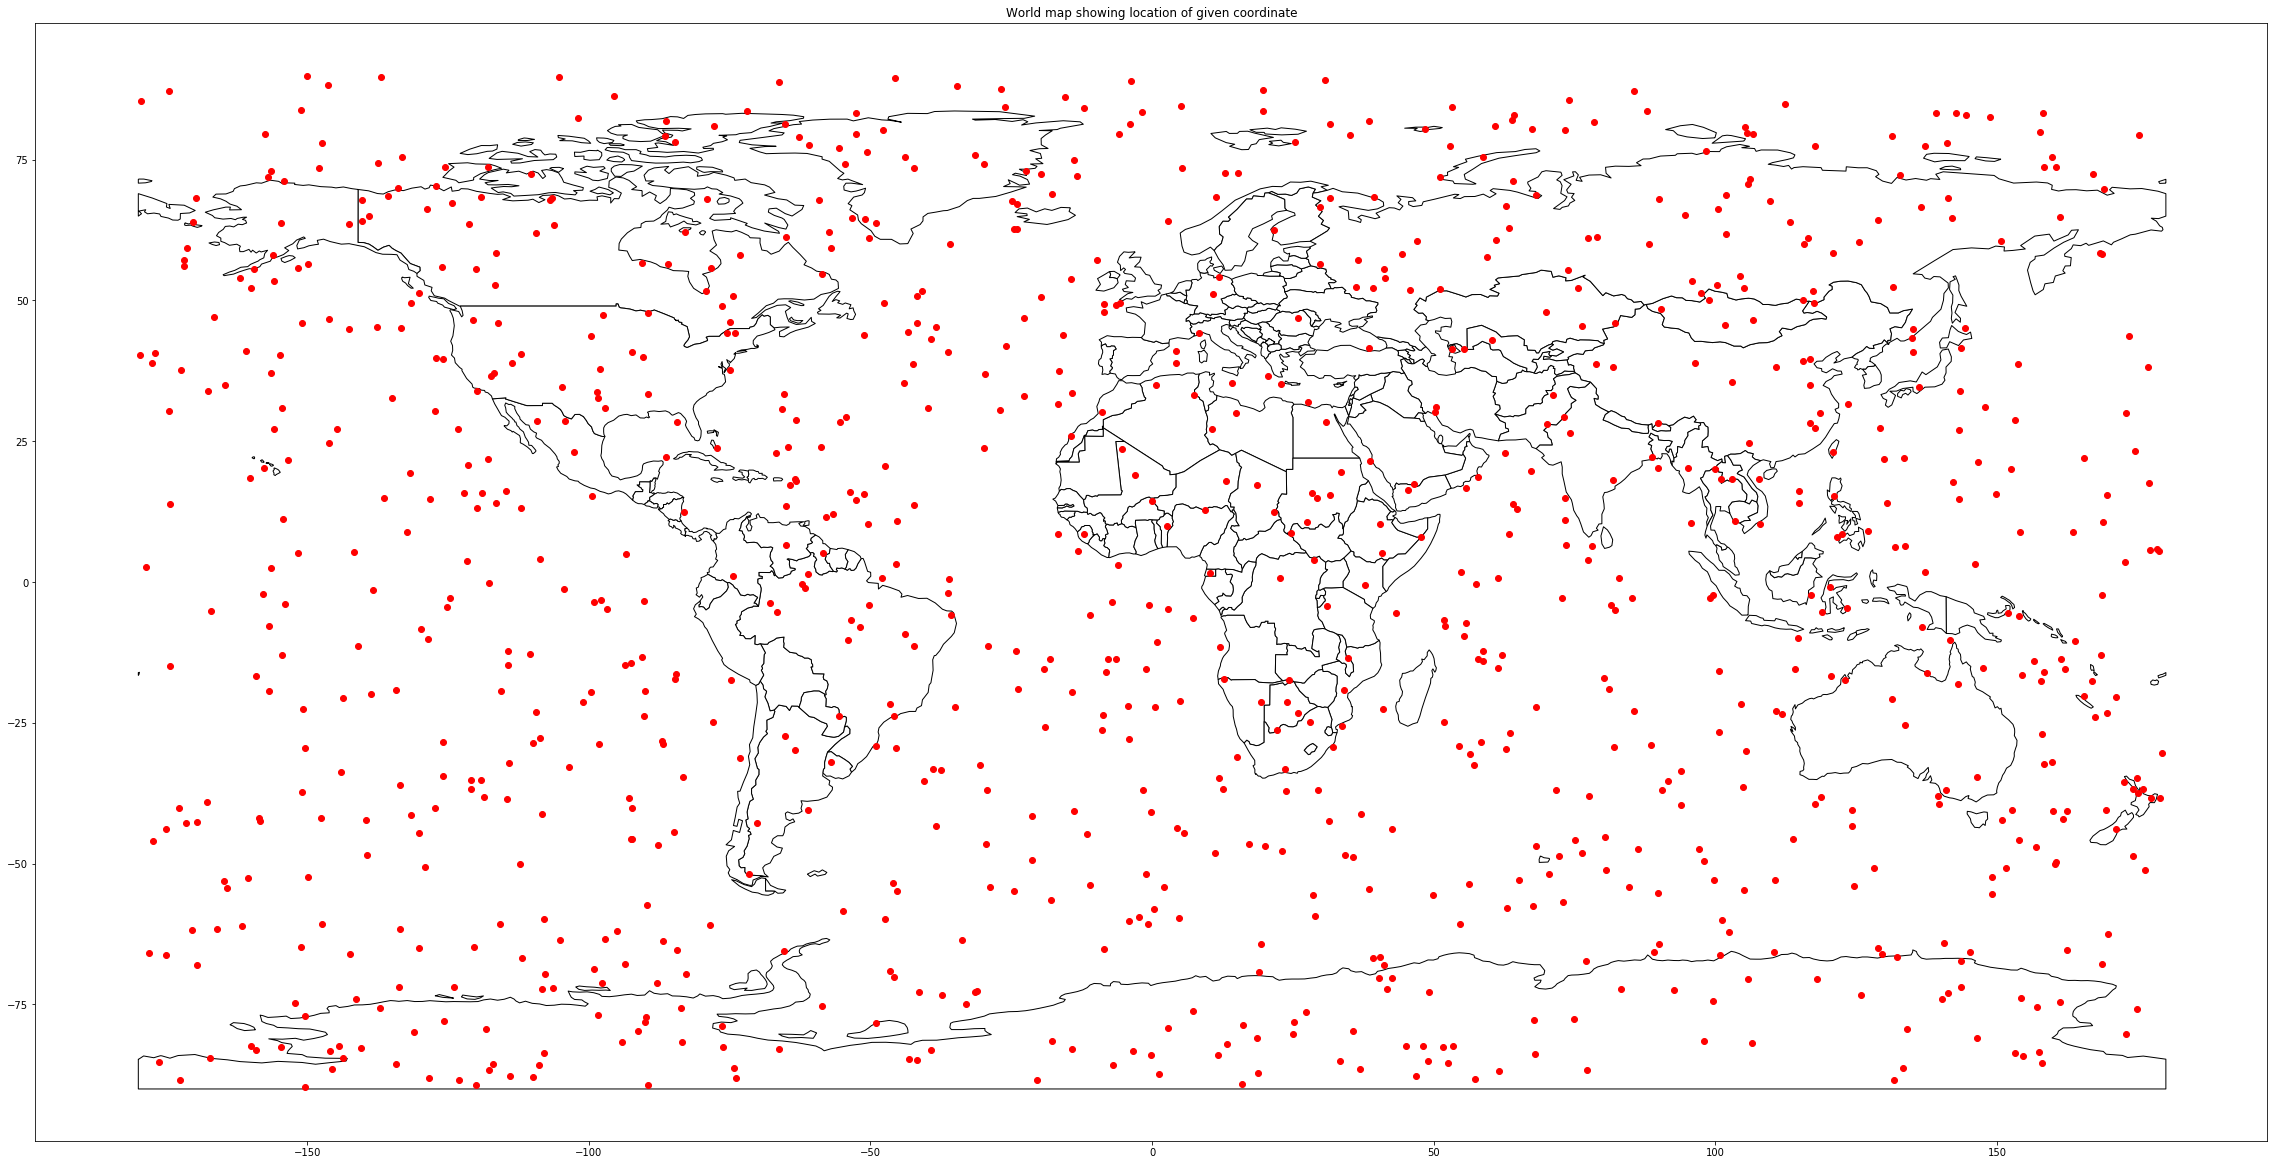

In [197]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot( color='white', edgecolor='black' ,figsize = (40,30))
gdf.plot(ax=ax, color='red')
plt.title("World map showing location of given coordinate")
print(world.head(3))
plt.show()

Custom Module to check if a given coordinate lies within the boundaries of a region

In [198]:
polys = geopandas.GeoSeries(world.loc[world['name'] == 'Russia'].geometry).values[0]
_pnts = Point(77.580643 , 12.972442)
_pnts1 = Point(55.018803 , 0.1278)
print("Is London present inside polygon(Russia) : " ,_pnts1.within(polys))
print("Is Bangalore present inside polygon(Russia) : " ,_pnts.within(polys))



Is London present inside polygon(Russia) :  False
Is Bangalore present inside polygon(Russia) :  False


In [199]:
df_new = world[['continent' , 'name' , 'geometry']]

In [200]:
df_india = pd.DataFrame(sjoin(gdf,df_new[df_new.name == "India"], how = 'left'))
# print(df_india.dropna())
# working 

In [201]:
df_india = pd.DataFrame(sjoin(gdf,df_new[df_new.name == "India"], how = 'left'))
df_russia = pd.DataFrame(sjoin(gdf,df_new[df_new.name == "Russia"], how = 'left'))
df_merge = df_india.fillna(df_russia)
print(df_india.columns)

Index(['geometry', 'index_right', 'continent', 'name'], dtype='object')


Running the above module for all the countries and returning a single output file that states to which country the coordinate belongs

In [202]:
df_merged = pd.DataFrame(np.nan, index=range(data_points), columns=['name'])
for country in df_new.name:
    df_country = pd.DataFrame(sjoin(gdf, df_new[df_new.name == country], how='left'))
    df_merged = df_merged.fillna(df_country)

In [203]:
print(df_merged.shape)

(1000, 1)


In [204]:
print(df_merged)

              name
0              NaN
1              NaN
2            India
3           Brazil
4              NaN
5              NaN
6              NaN
7              NaN
8            China
9       Antarctica
10          Canada
11             NaN
12             NaN
13             NaN
14          Russia
15             NaN
16             NaN
17             NaN
18             NaN
19      Antarctica
20          Russia
21             NaN
22             NaN
23       Argentina
24      Kazakhstan
25             NaN
26             NaN
27             NaN
28           China
29             NaN
..             ...
970            NaN
971     Antarctica
972            NaN
973            NaN
974            NaN
975        Namibia
976            NaN
977            NaN
978            NaN
979  United States
980            NaN
981            NaN
982            NaN
983         Russia
984            NaN
985      Greenland
986            NaN
987        Algeria
988            NaN
989         Russia
990         